In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, fbeta_score, precision_score, recall_score, roc_curve


# Lecture et prétraitement des données

### Lecture et premières informations

In [2]:
data = pd.read_csv("placementdata.csv")
print(data.info())
data["PlacementStatus"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB
None


PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64

La première chose à remarquer est l'absence de valeurs manquantes, ce qui facilite l'utilisation du dataset.
hormis notre variable d'interêt, nous avons deux variables de type 'object' qu'il faudra donc convertir en 'int64' par une modification. 

On peut percevoir un décalage prononcé entre le nombre de Placed et de NotPlaced. Utiliser des poids de classes rééquilibrés est donc une perspective pour essayer d'améliorer nos modèles, néanmoins sans garanties car aucune des deux classes ne peut être qualifiée de rare. 

### Remplacement des variables objects

In [3]:
data = data.replace({'Yes': 1, 'No': 0})

## Modèles

#### Séparations des échantillons d'apprentissage et de tests

In [4]:
y = data["PlacementStatus"]
X = data.drop("PlacementStatus", axis=1)
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Tree

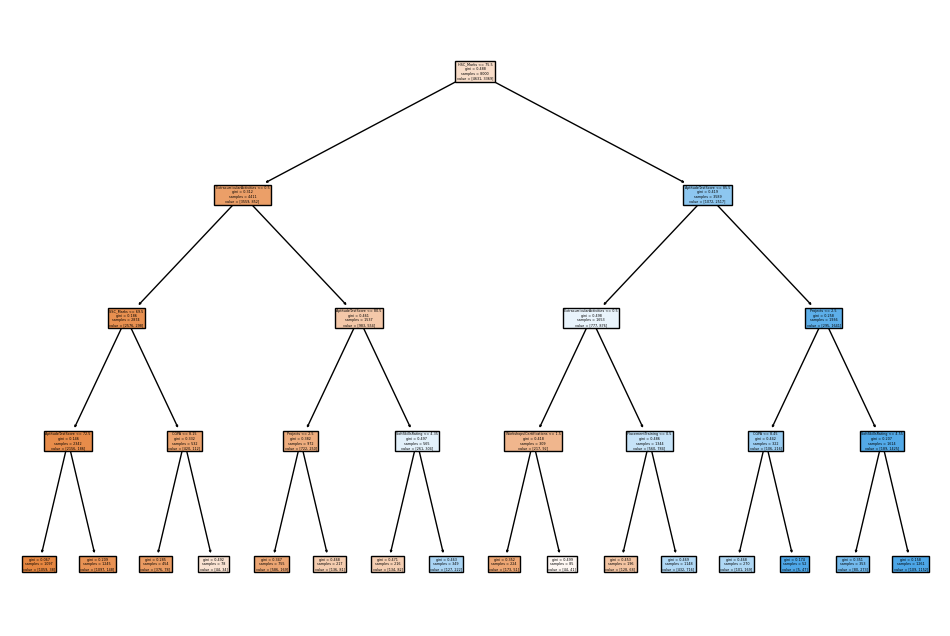

Le pourcentage de bien classés est de : 78.14999999999999 %
Le Recall est de : 0.7560386473429952
La Precision est de : 0.727061556329849
Le F-0.5-score est de : 0.7326779026217229


,NotPlaced_predit,Placed_predit
NotPlaced_données,937,235
Placed_données,202,626


In [5]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x_train, y_train)
columns = X.columns

# Affichage de l'arbre de décision
plt.figure(figsize=(12,8))
plot_tree(tree, feature_names= X.columns, filled=True)
plt.show()

#Evaluation du modèle
print(f"Le pourcentage de bien classés est de : {accuracy_score(y_test, tree.predict(x_test))*100} %")
print(f"Le Recall est de : {recall_score(y_test, tree.predict(x_test), pos_label='Placed')}")
print(f"La Precision est de : {precision_score(y_test, tree.predict(x_test), pos_label='Placed')}")
print(f"Le F-0.5-score est de : {fbeta_score(y_test, tree.predict(x_test), beta=0.5, pos_label='Placed')}")
pd.DataFrame(confusion_matrix(y_test, tree.predict(x_test)),
             index = ["NotPlaced_données", "Placed_données"],
             columns = ["NotPlaced_predit", "Placed_predit"])


# Random Forest

In [6]:
model_rf = RandomForestClassifier(max_depth=5)
model_rf.fit(x_train, y_train)

#Evaluation du modèle
print(f"Le pourcentage de bien classés est de : {accuracy_score(y_test, model_rf.predict(x_test))*100} %")
print(f"Le Recall est de : {recall_score(y_test, model_rf.predict(x_test), pos_label='Placed')}")
print(f"La Precision est de : {precision_score(y_test, model_rf.predict(x_test), pos_label='Placed')}")
print(f"Le F-0.5-score est de : {fbeta_score(y_test, model_rf.predict(x_test), beta=0.5, pos_label='Placed')}")
pd.DataFrame(confusion_matrix(y_test, model_rf.predict(x_test)),
             index = ["NotPlaced_données", "Placed_données"],
             columns = ["NotPlaced_predit", "Placed_predit"])


Le pourcentage de bien classés est de : 79.2 %
Le Recall est de : 0.7439613526570048
La Precision est de : 0.751219512195122
Le F-0.5-score est de : 0.7497565725413826


,NotPlaced_predit,Placed_predit
NotPlaced_données,968,204
Placed_données,212,616


# Neural Network

17, 17, 17, 7, 5, 17, 31
17, 7, 37, 29, 61, 41
17, 7, 37, 29, 61, 41

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score, confusion_matrix
import random
import joblib
import pandas as pd

premiers = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
n_jobs = -1  # Utiliser tous les cœurs disponibles

# Fonction d'entraînement d'un modèle
def entrainer_mlp(_):
    combinaison = random.sample(premiers, 9)
    test_mlp = MLPClassifier(hidden_layer_sizes=combinaison, max_iter=1000, random_state=42, activation='relu')
    test_mlp.fit(x_train, y_train)
    accuracy = accuracy_score(y_test, test_mlp.predict(x_test))
    return (accuracy, test_mlp, combinaison)

# Exécution parallèle
resultats = joblib.Parallel(n_jobs=n_jobs)(joblib.delayed(entrainer_mlp)(i) for i in range(200))

# Sélection du meilleur modèle
accu, model_mlp, couche = max(resultats, key=lambda x: x[0])

# Évaluation du meilleur modèle
print(f"Le pourcentage de bien classés est de : {accu * 100:.2f} %")
print(f"Le Recall est de : {recall_score(y_test, model_mlp.predict(x_test), pos_label='Placed')}")
print(f"La Precision est de : {precision_score(y_test, model_mlp.predict(x_test), pos_label='Placed')}")
print(f"Le F-0.5-score est de : {fbeta_score(y_test, model_mlp.predict(x_test), beta=0.5, pos_label='Placed')}")

# Matrice de confusion
df_cm = pd.DataFrame(confusion_matrix(y_test, model_mlp.predict(x_test)),
                     index=["NotPlaced_données", "Placed_données"],
                     columns=["NotPlaced_predit", "Placed_predit"])
print(df_cm)


Le pourcentage de bien classés est de : 79.45 %
Le Recall est de : 0.7246376811594203
La Precision est de : 0.7662835249042146
Le F-0.5-score est de : 0.7575757575757577
                   NotPlaced_predit  Placed_predit
NotPlaced_données               989            183
Placed_données                  228            600


: 

In [10]:
max(resultats, key=lambda x: x[0])

(0.7915,
 MLPClassifier(hidden_layer_sizes=[17, 7, 37, 29, 61, 41], max_iter=1000,
               random_state=42),
 [17, 7, 37, 29, 61, 41])

11, 19
77,2

In [ ]:
#ROC
fpr, tpr, _ = roc_curve(y_test, model_rf.predict_proba(x_test)[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve ')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()